# CICIDS2017: Detecção de Anomalias em Redes IoT com
Técnicas de Inteligência Artificial e Aprendizado de MáquinaS

Esse código referencia o aritgo "[**CICIDS2017: Detecção de Anomalias em Redes IoT com
Técnicas de Inteligência Artificial e Aprendizado de MáquinaS**]
**

Authors: J.P.D Marques (jopdaltro@gmail.com)

Organization: UNIVERSIDADE FEDERAL DO RECÔNCAVO DA BAHIA (UFRB), CENTRO DE CIÊNCIAS EXATAS E TECNOLÓGICAS

Repositorio:https://github.com/jopdaltro/Cicids2017-Ml


## Import libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Blibiotecas necessarias para rodar o codigo:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance


from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Basicamente o codigo funciona lendo os arquivos csvs disponiveis em "https://www.unb.ca/cic/datasets/ids-2017.html" e aplicando as técnicas de ciencias de dados e inteligencia artificial, para conseguir detectar ataques cybernéticos usando fluxo de redes.


In [3]:
#Juntando todos os arquivos CSV
import os

# Lista de nomes de arquivos CSV
file_paths = [
    "Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv",
    "Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv",
    "Friday-WorkingHours-Morning.pcap_ISCX.csv",
    "Monday-WorkingHours.pcap_ISCX.csv",
    "Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv",
    "Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv",
    "Tuesday-WorkingHours.pcap_ISCX.csv",
    "Wednesday-workingHours.pcap_ISCX.csv"
]

concatenated_df = pd.DataFrame()

# Loop para ler e concatenar os arquivos CSV
for file_path in file_paths:
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        concatenated_df = pd.concat([concatenated_df, df])


concatenated_df.reset_index(drop=True, inplace=True)
concatenated_df.to_csv("CICIDS2017.csv", index=False)



'\n# Lista de nomes de arquivos CSV\nfile_paths = [\n    "Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv",\n    "Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv",\n    "Friday-WorkingHours-Morning.pcap_ISCX.csv",\n    "Monday-WorkingHours.pcap_ISCX.csv",\n    "Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv",\n    "Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv",\n    "Tuesday-WorkingHours.pcap_ISCX.csv",\n    "Wednesday-workingHours.pcap_ISCX.csv"\n]\n\n# Inicializa um DataFrame vazio\nconcatenated_df = pd.DataFrame()\n\n# Loop para ler e concatenar os arquivos CSV\nfor file_path in file_paths:\n    if os.path.exists(file_path):\n        df = pd.read_csv(file_path)\n        concatenated_df = pd.concat([concatenated_df, df])\n\n# Reinicia os índices do DataFrame resultante\nconcatenated_df.reset_index(drop=True, inplace=True)\n\n# Agora, \'concatenated_df\' contém todos os dados dos arquivos CSV concatenados em um único DataFrame.\n# Salve o DataFrame concate

In [4]:
#Lendo o dataset
df = pd.read_csv('CICIDS2017.csv') 
df.columns = df.columns.str.replace(' ', '')


In [5]:
df

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,53,32215,4,2,112,152,28,28,28.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830739,53,324,2,2,84,362,42,42,42.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830740,58030,82,2,1,31,6,31,0,15.5,21.92031,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830741,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [6]:
#retirando os valores infinitos e NAN
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [7]:
#unificando os diferentes tipos de ataques em um único valor 'WebAttack' e 'DDoS'
df['Label'] = df['Label'].replace({'Web Attack � Brute Force': 'WebAttack','Web Attack � XSS': 'WebAttack','Web Attack � Sql Injection': 'WebAttack'})
df['Label'] = df['Label'].replace({'DoS GoldenEye': 'DDoS','DoS slowloris': 'DDoS','DoS Slowhttptest': 'DDoS','DoS Hulk': 'DDoS'})


In [8]:
#Retirando Heartbleed e infiltration da coluna Label
mascara = ~df['Label'].isin(['Heartbleed', 'Infiltration'])

# Aplique a máscara para obter um novo DataFrame sem as linhas com esses rótulos
df = df[mascara]

In [9]:
Label = df['Label']
df.drop('Label',axis=1)

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,53,32215,4,2,112,152,28,28,28.0,0.00000,...,3,20,0.0,0.0,0,0,0.0,0.0,0,0
2830739,53,324,2,2,84,362,42,42,42.0,0.00000,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
2830740,58030,82,2,1,31,6,31,0,15.5,21.92031,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0
2830741,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,5,20,0.0,0.0,0,0,0.0,0.0,0,0


In [10]:
#Adicionalmente, realizamos uma análise minuciosa e obtemos diversas estatísticas
#(como desvio padrão, variância, média, entre outras) para cada uma das características de
#maneira separada
# Percorrendo todas as colunas do DataFrame
for coluna in df.select_dtypes(include=['number']):

    
    
    # Calculando o desvio padrão, variância e média da coluna
    desvio_padrao = df[coluna].std()
    variancia = df[coluna].var()
    media = df[coluna].mean()

    # Imprimindo informações sobre a coluna
    print('---', coluna, '---')
    print('Desvio padrão:', desvio_padrao)
    print('Variância:', variancia)
    print('Média:', media)
    
    
    if variancia == 0 or desvio_padrao == 0 or media == 0:
        # Removendo a coluna do DataFrame
        df = df.drop(coluna, axis=1)
        print('Coluna', coluna, 'removida')
    

--- DestinationPort ---
Desvio padrão: 18274.445161734722
Variância: 333955345.96924955
Média: 8061.660171460156
--- FlowDuration ---
Desvio padrão: 33666145.760294214
Variância: 1133409370353376.0
Média: 14799471.43696631
--- TotalFwdPackets ---
Desvio padrão: 750.0163359544524
Variância: 562524.504198542
Média: 9.348507636069932
--- TotalBackwardPackets ---
Desvio padrão: 997.8763094184653
Variância: 995757.1288986166
Média: 10.386189900450134
--- TotalLengthofFwdPackets ---
Desvio padrão: 9552.742035073348
Variância: 91254880.3886573
Média: 545.0166824090142
--- TotalLengthofBwdPackets ---
Desvio padrão: 2264205.7005485375
Variância: 5126627454396.493
Média: 16150.927507639253
--- FwdPacketLengthMax ---
Desvio padrão: 717.457245720643
Variância: 514744.8994370511
Média: 207.77741299067236
--- FwdPacketLengthMin ---
Desvio padrão: 60.35579884807766
Variância: 3642.822454589613
Média: 18.729540576887782
--- FwdPacketLengthMean ---
Desvio padrão: 186.1717906571571
Variância: 34659.9356

In [11]:
#efetuamos o Teste de Correlação de Pearson e Removemos os recursos em
#que essa métrica estava acima ou abaixo do limite de 0,95 ou -0,95



# Calcula a matriz de correlação de Pearson
matriz_correlacao = df.select_dtypes(include=['number']).corr()

# Define o limite de correlação
limite_correlacao = 0.95

# Cria uma lista para armazenar as colunas a serem removidas
colunas_remover = []

# Percorre a matriz de correlação
for i in range(len(matriz_correlacao.columns)):
    for j in range(i):
        # Verifica se a correlação é maior do que o limite
        if abs(matriz_correlacao.iloc[i, j]) > limite_correlacao:
            coluna1 = matriz_correlacao.columns[i]
            coluna2 = matriz_correlacao.columns[j]
            print(f'As colunas "{coluna1}" e "{coluna2}" estão altamente correlacionadas ({matriz_correlacao.iloc[i, j]:.2f}).')
            # Adiciona uma das colunas à lista de colunas a serem removidas
            if coluna1 not in colunas_remover:
                colunas_remover.append(coluna1)

# Remove as colunas altamente correlacionadas do DataFrame
df = df.drop(colunas_remover, axis=1)
print(f'\nForam removidas {len(colunas_remover)} colunas altamente correlacionadas.')
print(f'O novo DataFrame tem {df.shape[1]} colunas.')


As colunas "TotalBackwardPackets" e "TotalFwdPackets" estão altamente correlacionadas (1.00).
As colunas "TotalLengthofBwdPackets" e "TotalFwdPackets" estão altamente correlacionadas (1.00).
As colunas "TotalLengthofBwdPackets" e "TotalBackwardPackets" estão altamente correlacionadas (0.99).
As colunas "FwdPacketLengthStd" e "FwdPacketLengthMax" estão altamente correlacionadas (0.97).
As colunas "BwdPacketLengthMean" e "BwdPacketLengthMax" estão altamente correlacionadas (0.96).
As colunas "BwdPacketLengthStd" e "BwdPacketLengthMax" estão altamente correlacionadas (0.98).
As colunas "FwdIATTotal" e "FlowDuration" estão altamente correlacionadas (1.00).
As colunas "FwdIATMax" e "FlowIATMax" estão altamente correlacionadas (1.00).
As colunas "FwdPackets/s" e "FlowPackets/s" estão altamente correlacionadas (0.99).
As colunas "PacketLengthStd" e "MaxPacketLength" estão altamente correlacionadas (0.98).
As colunas "SYNFlagCount" e "FwdPSHFlags" estão altamente correlacionadas (1.00).
As col

In [12]:
df.Label.value_counts()

Label
BENIGN         2271320
DDoS            379737
PortScan        158804
FTP-Patator       7935
SSH-Patator       5897
WebAttack         2180
Bot               1956
Name: count, dtype: int64

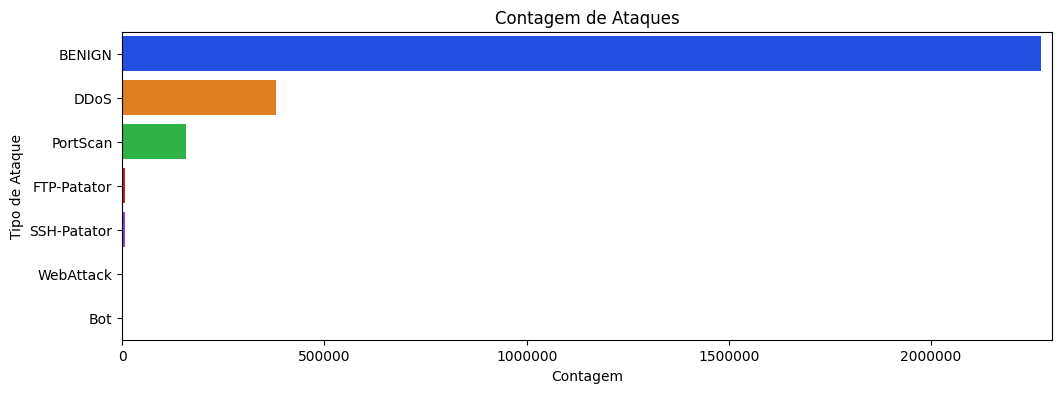

<Figure size 640x480 with 0 Axes>

In [13]:
# Contar o número de ocorrências de cada tipo de ataque

contagem_de_ataques = df['Label'].value_counts().reset_index()
contagem_de_ataques.columns = ['Tipo de Ataque', 'Contagem']

# Embaralhar as cores aleatoriamente
cores_aleatorias = [sns.color_palette()[random.randint(0, len(sns.color_palette()) - 1)] for _ in range(len(contagem_de_ataques))]

# Criar o gráfico de barras horizontais com cores aleatórias
plt.figure(figsize=(12, 4))  # Tamanho da figura (opcional)
sns.barplot(x='Contagem', y='Tipo de Ataque', data=contagem_de_ataques,palette='bright')
plt.title('Contagem de Ataques')
plt.xlabel('Contagem')
plt.ylabel('Tipo de Ataque')
plt.xlim(0, 2300000)  # Define a escala no eixo x de 0 a 200.000
plt.gca().get_xaxis().get_major_formatter().set_scientific(False)  # Desabilita a notação científica no eixo x
plt.show()
plt.tight_layout()

# Mostrar o gráfico
plt.show()

### Preprocessamento (normalização)

In [14]:
# Z-score normalization
features = df.dtypes[df.dtypes != 'object'].index
df[features] = df[features].apply(
    lambda x: (x - x.mean()) / (x.std()))
# Fill empty values by 0
df = df.fillna(0)

### Amostragem de dados
Devido ao limite de espaço nos arquivos do GitHub e ao grande tamanho dos dados de tráfego de rede, realizamos uma amostragem de um subconjunto de pequeno tamanho para o aprendizado do modelo usando o método de amostragem de cluster k-means.

In [15]:

# Crie o LabelEncoder e ajuste aos dados
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])

# Obtenha a contagem de valores e ordene por contagem
value_counts = df['Label'].value_counts().reset_index()
value_counts.columns = ['Label', 'Count']
value_counts = value_counts.sort_values(by='Count', ascending=False)

# Atualize os rótulos no DataFrame com os rótulos ordenados por contagem
label_mapping = {label: new_label for new_label, label in enumerate(value_counts['Label'])}
df['Label'] = df['Label'].map(label_mapping)

# Agora, os rótulos estão ordenados por contagem
print(df['Label'].value_counts())



Label
0    2271320
1     379737
2     158804
3       7935
4       5897
5       2180
6       1956
Name: count, dtype: int64


In [16]:
# Manter as instâncias da classe minoritária e amostrar as instâncias da classe majoritária
valores_filtrados = [3, 4, 5, 6]
df_minor = df[df['Label'].isin(valores_filtrados)]
df_major = df.drop(df_minor.index)

In [17]:
df_minor

,DestinationPort,FlowDuration,TotalFwdPackets,TotalLengthofFwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,BwdPacketLengthMax,BwdPacketLengthMin,FlowBytes/s,...,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleStd,Label
536284,0.001004,1.348630,-0.000465,-0.023346,0.159205,-0.310319,-0.120725,-0.316228,-0.596529,-0.057506,...,1.548609,-0.222163,-0.006930,0.002558,-0.027624,-0.048077,-0.048850,-0.012843,-0.101912,6
536889,0.001004,-0.437876,-0.011131,-0.057053,-0.289603,-0.310319,-0.312902,-0.447714,-0.596529,-0.057507,...,-0.471082,-0.222163,-0.008501,0.002558,-0.125864,-0.104676,-0.149462,-0.101093,-0.109500,6
568588,0.001004,-0.435591,-0.007131,-0.035489,-0.019203,-0.310319,-0.036275,-0.381971,-0.596529,-0.057409,...,0.083648,-0.207142,-0.003789,0.002547,-0.125864,-0.104676,-0.149462,-0.101093,-0.109500,6
568613,-0.340402,-0.439593,-0.011131,-0.056425,-0.281240,-0.210908,-0.280673,-0.444632,-0.509423,-0.051999,...,-0.471082,-0.204894,-0.008501,0.002547,-0.125864,-0.104676,-0.149462,-0.101093,-0.109500,6
568808,0.001004,-0.435800,-0.007131,-0.035489,-0.019203,-0.310319,-0.036275,-0.381971,-0.596529,-0.057404,...,0.083648,-0.207142,-0.003789,0.002547,-0.125864,-0.104676,-0.149462,-0.101093,-0.109500,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2137815,-0.439940,-0.035344,0.016868,0.153148,0.602437,-0.310319,0.177359,0.053577,-0.596529,-0.057493,...,1.548609,-0.205959,0.016628,0.002558,-0.125864,-0.104676,-0.149462,-0.101093,-0.109500,4
2137819,-0.439940,-0.034031,0.016868,0.153148,0.602437,-0.310319,0.177359,0.053577,-0.596529,-0.057493,...,1.548609,-0.205959,0.016628,0.002558,-0.125864,-0.104676,-0.149462,-0.101093,-0.109500,4
2137820,-0.439940,-0.033214,0.016868,0.153148,0.602437,-0.310319,0.177359,0.053577,-0.596529,-0.057493,...,1.548609,-0.205959,0.016628,0.002558,-0.125864,-0.104676,-0.149462,-0.101093,-0.109500,4
2137945,-0.439940,-0.034868,0.016868,0.153148,0.602437,-0.310319,0.177359,0.053577,-0.596529,-0.057493,...,1.548609,-0.205959,0.016628,0.002558,-0.125864,-0.104676,-0.149462,-0.101093,-0.109500,4


In [18]:
X = df_major.drop(['Label'],axis=1) 
y = df_major.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)

In [19]:
# Utilizar o k-means para agrupar as amostras de dados e selecionar uma proporção de dados de cada cluster
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=1000, random_state=0).fit(X)

In [20]:
klabel=kmeans.labels_
df_major['klabel']=klabel

In [21]:
df_major['klabel'].value_counts()

klabel
910    22789
14     17863
77     17396
391    16417
474    12825
       ...  
478       44
335       41
84        39
821       14
277        6
Name: count, Length: 1000, dtype: int64

In [22]:
cols = list(df_major)
cols.insert(48, cols.pop(cols.index('Label')))
df_major = df_major.loc[:, cols]

In [23]:
df_major

,DestinationPort,FlowDuration,TotalFwdPackets,TotalLengthofFwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,BwdPacketLengthMax,BwdPacketLengthMin,FlowBytes/s,...,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleStd,klabel,Label
0,2.561136,-0.439595,-0.009798,-0.055797,-0.281240,-0.210908,-0.280673,-0.447714,-0.596529,0.096693,...,-0.235292,-0.006930,0.002547,-0.125864,-0.104676,-0.149462,-0.101093,-0.1095,404,0
1,2.571478,-0.439592,-0.011131,-0.056425,-0.281240,-0.210908,-0.280673,-0.444632,-0.509423,-0.053263,...,-0.204894,-0.008501,0.002547,-0.125864,-0.104676,-0.149462,-0.101093,-0.1095,601,0
2,2.571533,-0.439594,-0.011131,-0.056425,-0.281240,-0.210908,-0.280673,-0.444632,-0.509423,-0.048610,...,-0.204894,-0.008501,0.002547,-0.125864,-0.104676,-0.149462,-0.101093,-0.1095,735,0
3,2.088947,-0.439594,-0.011131,-0.056425,-0.281240,-0.210908,-0.280673,-0.444632,-0.509423,-0.043901,...,-0.196260,-0.008501,0.002547,-0.125864,-0.104676,-0.149462,-0.101093,-0.1095,479,0
4,2.561027,-0.439595,-0.009798,-0.055797,-0.281240,-0.210908,-0.280673,-0.447714,-0.596529,0.096693,...,-0.235292,-0.006930,0.002547,-0.125864,-0.104676,-0.149462,-0.101093,-0.1095,404,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,-0.438244,-0.438638,-0.007131,-0.045329,-0.250576,0.153597,-0.162503,-0.408679,0.506814,-0.057191,...,-0.235292,-0.003789,0.002547,-0.125864,-0.104676,-0.149462,-0.101093,-0.1095,813,0
2830739,-0.438244,-0.439585,-0.009798,-0.048260,-0.231062,0.385555,-0.087303,-0.354749,2.031169,-0.004441,...,-0.235292,-0.006930,0.002547,-0.125864,-0.104676,-0.149462,-0.101093,-0.1095,316,0
2830740,2.734329,-0.439593,-0.009798,-0.053808,-0.246394,-0.310319,-0.229645,-0.444632,-0.509423,-0.040112,...,-0.235174,-0.008501,0.002558,-0.125864,-0.104676,-0.149462,-0.101093,-0.1095,755,0
2830741,-0.438244,-0.408447,-0.004465,-0.036954,-0.245001,0.219870,-0.141017,-0.381971,1.261733,-0.057490,...,-0.235292,-0.000648,0.002547,-0.125864,-0.104676,-0.149462,-0.101093,-0.1095,987,0


In [24]:
#reduzindo o tamanho do dataset
def typicalSampling(group):
    name = group.name
    frac = 0.05
    return group.sample(frac=frac)

result = df_major.groupby(
    'klabel', group_keys=False
).apply(typicalSampling)

In [25]:
result['Label'].value_counts()

Label
0    113612
1     18973
2      7923
Name: count, dtype: int64

In [26]:
result = result.drop(['klabel'],axis=1)
result = pd.concat([result, df_minor])


In [27]:
result['Label'].value_counts()

Label
0    113612
1     18973
3      7935
2      7923
4      5897
5      2180
6      1956
Name: count, dtype: int64

In [28]:
result

,DestinationPort,FlowDuration,TotalFwdPackets,TotalLengthofFwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,BwdPacketLengthMax,BwdPacketLengthMin,FlowBytes/s,...,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleStd,Label
1086223,2.234450,-0.439593,-0.011131,-0.057053,-0.289603,-0.310319,-0.312902,-0.447714,-0.596529,-0.057507,...,-0.463272,-0.198507,-0.008501,0.002558,-0.125864,-0.104676,-0.149462,-0.101093,-0.1095,0
1502832,2.337217,-0.439593,-0.011131,-0.057053,-0.289603,-0.310319,-0.312902,-0.447714,-0.596529,-0.057507,...,-0.467874,-0.208088,-0.008501,0.002558,-0.125864,-0.104676,-0.149462,-0.101093,-0.1095,0
2811354,2.259786,-0.439594,-0.011131,-0.057053,-0.289603,-0.310319,-0.312902,-0.447714,-0.596529,-0.057507,...,-0.487400,-0.208088,-0.008501,0.002558,-0.125864,-0.104676,-0.149462,-0.101093,-0.1095,0
1117281,2.291360,-0.439594,-0.011131,-0.057053,-0.289603,-0.310319,-0.312902,-0.447714,-0.596529,-0.057507,...,-0.463133,-0.206195,-0.008501,0.002558,-0.125864,-0.104676,-0.149462,-0.101093,-0.1095,0
2122198,2.292126,-0.439593,-0.011131,-0.057053,-0.289603,-0.310319,-0.312902,-0.447714,-0.596529,-0.057507,...,-0.451906,-0.205131,-0.008501,0.002547,-0.125864,-0.104676,-0.149462,-0.101093,-0.1095,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2137815,-0.439940,-0.035344,0.016868,0.153148,0.602437,-0.310319,0.177359,0.053577,-0.596529,-0.057493,...,1.548609,-0.205959,0.016628,0.002558,-0.125864,-0.104676,-0.149462,-0.101093,-0.1095,4
2137819,-0.439940,-0.034031,0.016868,0.153148,0.602437,-0.310319,0.177359,0.053577,-0.596529,-0.057493,...,1.548609,-0.205959,0.016628,0.002558,-0.125864,-0.104676,-0.149462,-0.101093,-0.1095,4
2137820,-0.439940,-0.033214,0.016868,0.153148,0.602437,-0.310319,0.177359,0.053577,-0.596529,-0.057493,...,1.548609,-0.205959,0.016628,0.002558,-0.125864,-0.104676,-0.149462,-0.101093,-0.1095,4
2137945,-0.439940,-0.034868,0.016868,0.153148,0.602437,-0.310319,0.177359,0.053577,-0.596529,-0.057493,...,1.548609,-0.205959,0.016628,0.002558,-0.125864,-0.104676,-0.149462,-0.101093,-0.1095,4


In [29]:
#salvando a preparação dos dados
result.to_csv('./CICIDS2017_sample_km.csv',index=0)

### split train set and test set

In [31]:
df=pd.read_csv('CICIDS2017_sample_km.csv')

In [32]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [33]:

'''
# Suponha que 'df' seja o seu DataFrame com a coluna 'Label' contendo os valores codificados

# Mapear os valores codificados de volta para os tipos de ataques correspondentes
mapeamento = {
    0: 'BEGING',
    1: 'DDoS',
    2: 'Portscan',
    4: 'FTP-Patator',
    3: 'SSH-Patator ',
    5: 'WebAttack ',
    6: 'Botnet',
    # Adicione os mapeamentos para os valores codificados restantes
}

# Aplicar o mapeamento para criar uma nova coluna 'Tipo de Ataque'
df['Tipo de Ataque'] = df['Label'].map(mapeamento)

# Contar o número de ocorrências de cada tipo de ataque
contagem_de_ataques = df['Tipo de Ataque'].value_counts().reset_index()
contagem_de_ataques.columns = ['Tipo de Ataque', 'Contagem']

# Criar o gráfico de barras horizontais com cores aleatórias
plt.figure(figsize=(12, 4))  # Tamanho da figura (opcional)

sns.barplot(x='Contagem', y='Tipo de Ataque', data=contagem_de_ataques,palette='bright')
sns.color_palette('bright')
plt.title('Contagem de Ataques')
plt.xlabel('Contagem')
plt.ylabel('Tipo de Ataque')
plt.xlim(0, 125000)  # Define a escala no eixo x de 0 a 200.000
plt.tight_layout()

# Mostrar o gráfico
plt.show()
'''

"\n# Suponha que 'df' seja o seu DataFrame com a coluna 'Label' contendo os valores codificados\n\n# Mapear os valores codificados de volta para os tipos de ataques correspondentes\nmapeamento = {\n    0: 'BEGING',\n    1: 'DDoS',\n    2: 'Portscan',\n    4: 'FTP-Patator',\n    3: 'SSH-Patator ',\n    5: 'WebAttack ',\n    6: 'Botnet',\n    # Adicione os mapeamentos para os valores codificados restantes\n}\n\n# Aplicar o mapeamento para criar uma nova coluna 'Tipo de Ataque'\ndf['Tipo de Ataque'] = df['Label'].map(mapeamento)\n\n# Contar o número de ocorrências de cada tipo de ataque\ncontagem_de_ataques = df['Tipo de Ataque'].value_counts().reset_index()\ncontagem_de_ataques.columns = ['Tipo de Ataque', 'Contagem']\n\n# Criar o gráfico de barras horizontais com cores aleatórias\nplt.figure(figsize=(12, 4))  # Tamanho da figura (opcional)\n\nsns.barplot(x='Contagem', y='Tipo de Ataque', data=contagem_de_ataques,palette='bright')\nsns.color_palette('bright')\nplt.title('Contagem de Ataq

In [34]:
X = df.drop(['Label'],axis=1).values
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)

In [35]:
#separando em 80-20 o conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

## Engenharia de Recursos

### Feature selection by information gain

In [36]:
from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(X_train, y_train)

In [37]:
# calcular a soma dos escores de importância
f_list = sorted(zip(map(lambda x: round(x, 4), importances), features), reverse=True)
Sum = 0
fs = []
for i in range(0, len(f_list)):
    Sum = Sum + f_list[i][0]
    fs.append(f_list[i][1])

In [38]:
# Selecionar os recursos importantes de cima para baixo até que a importância acumulada atinja 90%
f_list2 = sorted(zip(map(lambda x: round(x, 4), importances/Sum), features), reverse=True)
Sum2 = 0
fs = []
for i in range(0, len(f_list2)):
    Sum2 = Sum2 + f_list2[i][0]
    fs.append(f_list2[i][1])
    if Sum2>=0.9:
        break        

In [39]:
X_fs = df[fs].values

In [40]:
X_fs.shape

(158476, 31)

### Seleção de recursos pelo Filtro Rápido Baseado em Correlação (FCBF)
https://github.com/SantiagoEG/FCBF_module

In [41]:
from FCBF_module import FCBF, FCBFK, FCBFiP, get_i
fcbf = FCBFK(k = 20)
fcbf.fit(X_fs, y)

In [42]:
X_fss = fcbf.fit_transform(X_fs,y)

In [43]:
X_fss.shape

(158476, 20)

### Re-dividir conjuntos de treino e teste após a seleção de recursos

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_fss,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [45]:
X_train.shape

(126780, 20)

In [46]:
# Atualize os rótulos no DataFrame com os rótulos ordenados por contagem
label_mapping = {label: new_label for new_label, label in enumerate(value_counts['Label'])}
df['Label'] = df['Label'].map(label_mapping)

# Agora, os rótulos estão ordenados por contagem
print(df['Label'].value_counts())

Label
0    113612
6     18973
3      7935
1      7923
2      5897
4      2180
5      1956
Name: count, dtype: int64


In [47]:
pd.Series(y_train).value_counts()

0    90889
1    15178
3     6348
2     6338
4     4718
5     1744
6     1565
Name: count, dtype: int64

### SMOTE para resolver o desequilíbrio de classes

In [48]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={4:5000,5:2200,6:2500})

In [49]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [50]:
pd.Series(y_train).value_counts()

0    90889
1    15178
3     6348
2     6338
4     5000
6     2500
5     2200
Name: count, dtype: int64

In [66]:
cmap = sns.diverging_palette(
    h_neg=240,
    h_pos=10,
    s=100,
    as_cmap=True,
)

class_names = ['Beningn','DDos','PortScan','FTP-Patator','SSH-Patator ','WebAttack','Botnet']




### Treinando quatro modelos base: árvore de decisão, floresta aleatória, XGBoost

#### XGBoost

Accuracy of XGBoost: 0.9901880363452802
Precision of XGBoost: 0.9901980064495363
Recall of XGBoost: 0.9901880363452802
F1-score of XGBoost: 0.9901880472485549
              precision    recall  f1-score   support

           0    0.99262   0.99393   0.99327     22723
           1    0.98508   0.97418   0.97960      3795
           2    0.98810   0.99495   0.99151      1585
           3    1.00000   0.99874   0.99937      1587
           4    1.00000   0.99915   0.99958      1179
           5    0.87528   0.88532   0.88027       436
           6    0.96667   0.96419   0.96543       391

    accuracy                        0.99019     31696
   macro avg    0.97253   0.97292   0.97272     31696
weighted avg    0.99020   0.99019   0.99019     31696



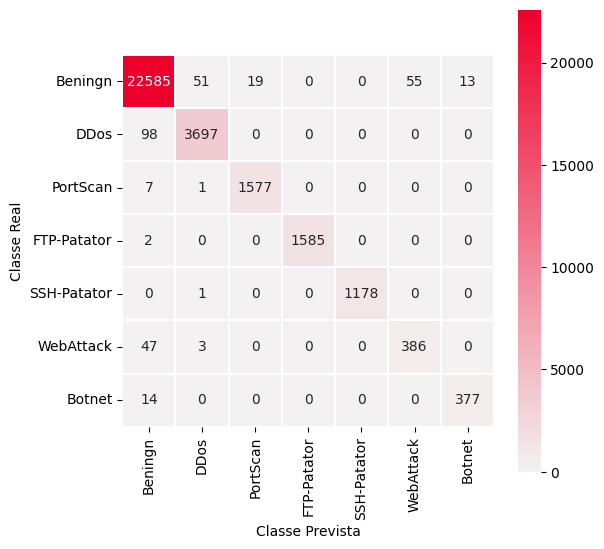

In [89]:
xg = xgb.XGBClassifier(n_estimators =1, max_depth = 7)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict,digits=5))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot=True,cmap=cmap, center=0, square=True,linewidths=0.01, fmt=".0f", ax=ax, xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.show()





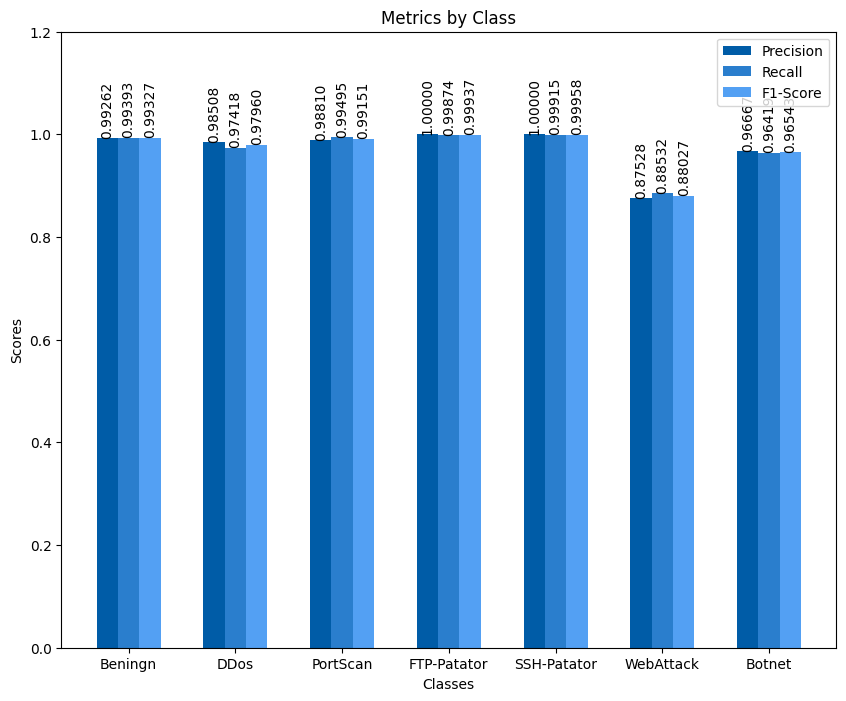

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


# Calcula o classification_report
report = classification_report(y_true, y_predict, digits=5, output_dict=True)

# Extrai as métricas relevantes
precision = [report[label]['precision'] for label in report.keys() if label.isdigit()]
recall = [report[label]['recall'] for label in report.keys() if label.isdigit()]
f1_score = [report[label]['f1-score'] for label in report.keys() if label.isdigit()]

# Nomes das classes
class_names = ['Beningn', 'DDos', 'PortScan', 'FTP-Patator', 'SSH-Patator', 'WebAttack', 'Botnet']

# Criação do gráfico de barras
fig, ax = plt.subplots(figsize=(10, 8))
bar_width = 0.2
index = range(len(class_names))

bar1 = ax.bar(index, precision, bar_width, label='Precision',color='#005ca7')
bar2 = ax.bar([i + bar_width for i in index], recall, bar_width, label='Recall',color='#2a7ecd')
bar3 = ax.bar([i + 2 * bar_width for i in index], f1_score, bar_width, label='F1-Score',color='#53a0f3')

ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Metrics by Class')
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(class_names)
ax.legend()

# Adiciona o eixo y de 0 a 1
ax.set_ylim(0, 1.2)

# Adiciona os valores das métricas ao lado de cada barra
for i, rect in enumerate(bar1):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{precision[i]:.5f}', ha='center', va='bottom', rotation=90)

for i, rect in enumerate(bar2):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{recall[i]:.5f}', ha='center', va='bottom', rotation=90)

for i, rect in enumerate(bar3):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{f1_score[i]:.5f}', ha='center', va='bottom', rotation=90)

plt.show()


In [55]:
'''
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'learning_rate':  abs(float(params['learning_rate'])),

    }
    clf = xgb.XGBClassifier( **params)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss':-score, 'status': STATUS_OK }

space = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 5),
    'max_depth': hp.quniform('max_depth', 4, 100, 1),
    'learning_rate': hp.normal('learning_rate', 0.01, 0.9),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("XGBoost: Hyperopt estimated optimum {}".format(best))
'''

'\nfrom hyperopt import hp, fmin, tpe, STATUS_OK, Trials\nfrom sklearn.model_selection import cross_val_score, StratifiedKFold\ndef objective(params):\n    params = {\n        \'n_estimators\': int(params[\'n_estimators\']), \n        \'max_depth\': int(params[\'max_depth\']),\n        \'learning_rate\':  abs(float(params[\'learning_rate\'])),\n\n    }\n    clf = xgb.XGBClassifier( **params)\n    clf.fit(X_train, y_train)\n    y_pred = clf.predict(X_test)\n    score = accuracy_score(y_test, y_pred)\n\n    return {\'loss\':-score, \'status\': STATUS_OK }\n\nspace = {\n    \'n_estimators\': hp.quniform(\'n_estimators\', 10, 100, 5),\n    \'max_depth\': hp.quniform(\'max_depth\', 4, 100, 1),\n    \'learning_rate\': hp.normal(\'learning_rate\', 0.01, 0.9),\n}\n\nbest = fmin(fn=objective,\n            space=space,\n            algo=tpe.suggest,\n            max_evals=20)\nprint("XGBoost: Hyperopt estimated optimum {}".format(best))\n'

Accuracy of XGBoost: 0.9975391216557294
Precision of XGBoost: 0.9976350952291259
Recall of XGBoost: 0.9975391216557294
F1-score of XGBoost: 0.9975659967176768
              precision    recall  f1-score   support

           0    0.99960   0.99705   0.99833     22723
           1    0.99921   0.99947   0.99934      3795
           2    0.98938   0.99937   0.99435      1585
           3    1.00000   1.00000   1.00000      1587
           4    1.00000   1.00000   1.00000      1179
           5    0.91898   0.98853   0.95249       436
           6    0.97243   0.99233   0.98228       391

    accuracy                        0.99754     31696
   macro avg    0.98280   0.99668   0.98954     31696
weighted avg    0.99764   0.99754   0.99757     31696



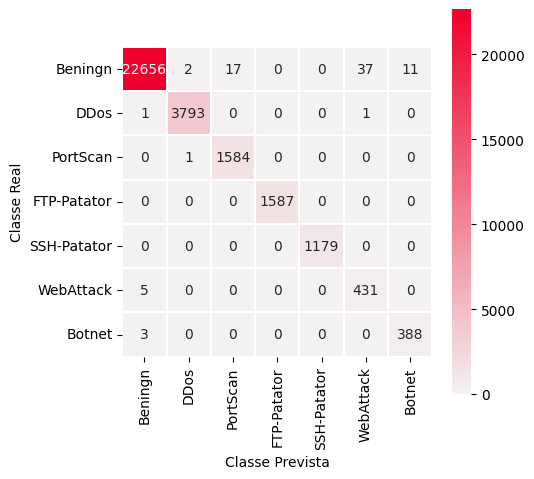

In [91]:

xg = xgb.XGBClassifier(learning_rate= 0.7685083018662053, n_estimators = 355, max_depth = 41)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict,digits=5))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True,cmap=cmap, center=0, square=True,linewidths=0.01, fmt=".0f", ax=ax, xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.show()

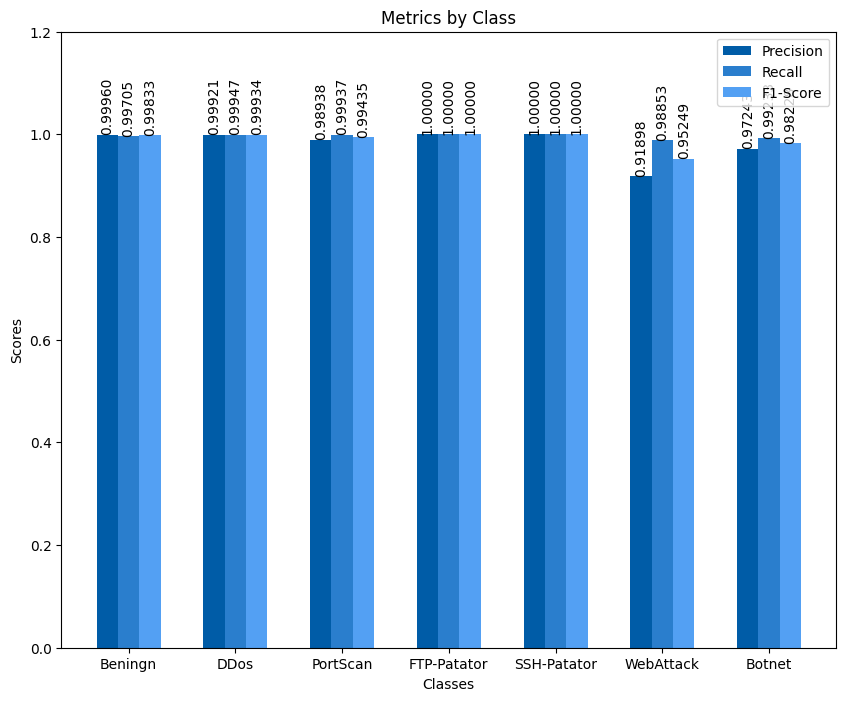

In [92]:
# Calcula o classification_report
report = classification_report(y_true, y_predict, digits=5, output_dict=True)

# Extrai as métricas relevantes
precision = [report[label]['precision'] for label in report.keys() if label.isdigit()]
recall = [report[label]['recall'] for label in report.keys() if label.isdigit()]
f1_score = [report[label]['f1-score'] for label in report.keys() if label.isdigit()]

# Nomes das classes
class_names = ['Beningn', 'DDos', 'PortScan', 'FTP-Patator', 'SSH-Patator', 'WebAttack', 'Botnet']

# Criação do gráfico de barras
fig, ax = plt.subplots(figsize=(10, 8))
bar_width = 0.2
index = range(len(class_names))

bar1 = ax.bar(index, precision, bar_width, label='Precision',color='#005ca7')
bar2 = ax.bar([i + bar_width for i in index], recall, bar_width, label='Recall',color='#2a7ecd')
bar3 = ax.bar([i + 2 * bar_width for i in index], f1_score, bar_width, label='F1-Score',color='#53a0f3')

ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Metrics by Class')
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(class_names)
ax.legend()

# Adiciona o eixo y de 0 a 1
ax.set_ylim(0, 1.2)

# Adiciona os valores das métricas ao lado de cada barra
for i, rect in enumerate(bar1):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{precision[i]:.5f}', ha='center', va='bottom', rotation=90)

for i, rect in enumerate(bar2):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{recall[i]:.5f}', ha='center', va='bottom', rotation=90)

for i, rect in enumerate(bar3):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{f1_score[i]:.5f}', ha='center', va='bottom', rotation=90)

plt.show()

#### Apply RandomForest

#### Hyperparameter optimization (HPO) of random forest using Bayesian optimization with tree-based Parzen estimator (BO-TPE)
Based on the GitHub repo for HPO: https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms

In [58]:
'''
# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = RandomForestClassifier( **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(best))
'''

'\n# Define the objective function\ndef objective(params):\n    params = {\n        \'n_estimators\': int(params[\'n_estimators\']), \n        \'max_depth\': int(params[\'max_depth\']),\n        \'max_features\': int(params[\'max_features\']),\n        "min_samples_split":int(params[\'min_samples_split\']),\n        "min_samples_leaf":int(params[\'min_samples_leaf\']),\n        "criterion":str(params[\'criterion\'])\n    }\n    clf = RandomForestClassifier( **params)\n    clf.fit(X_train,y_train)\n    score=clf.score(X_test,y_test)\n\n    return {\'loss\':-score, \'status\': STATUS_OK }\n# Define the hyperparameter configuration space\nspace = {\n    \'n_estimators\': hp.quniform(\'n_estimators\', 10, 200, 1),\n    \'max_depth\': hp.quniform(\'max_depth\', 5, 50, 1),\n    "max_features":hp.quniform(\'max_features\', 1, 20, 1),\n    "min_samples_split":hp.quniform(\'min_samples_split\',2,11,1),\n    "min_samples_leaf":hp.quniform(\'min_samples_leaf\',1,11,1),\n    "criterion":hp.choice(

Accuracy of RF: 0.9927751135790005
Precision of RF: 0.9928891040161107
Recall of RF: 0.9927751135790005
F1-score of RF: 0.9928191073153791
              precision    recall  f1-score   support

           0    0.99533   0.99498   0.99516     22723
           1    0.99391   0.98972   0.99181      3795
           2    0.98869   0.99243   0.99055      1585
           3    1.00000   0.99874   0.99937      1587
           4    0.99744   0.99152   0.99447      1179
           5    0.86638   0.92202   0.89333       436
           6    0.95641   0.95396   0.95519       391

    accuracy                        0.99278     31696
   macro avg    0.97117   0.97763   0.97427     31696
weighted avg    0.99289   0.99278   0.99282     31696



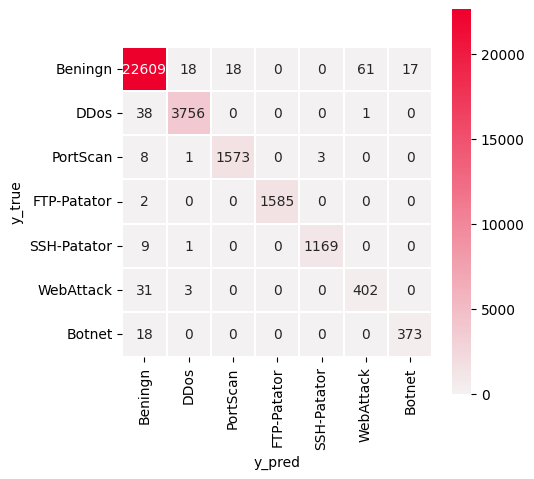

In [95]:
rf_hpo = RandomForestClassifier(n_estimators = 10, min_samples_leaf = 37, max_depth = 25, min_samples_split = 49, max_features = 5)

rf_hpo.fit(X_train,y_train)
rf_score=rf_hpo.score(X_test,y_test)
y_predict=rf_hpo.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict,digits=5))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True,cmap=cmap, center=0, square=True,linewidths=0.01, fmt=".0f", ax=ax, xticklabels=class_names, yticklabels=class_names)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

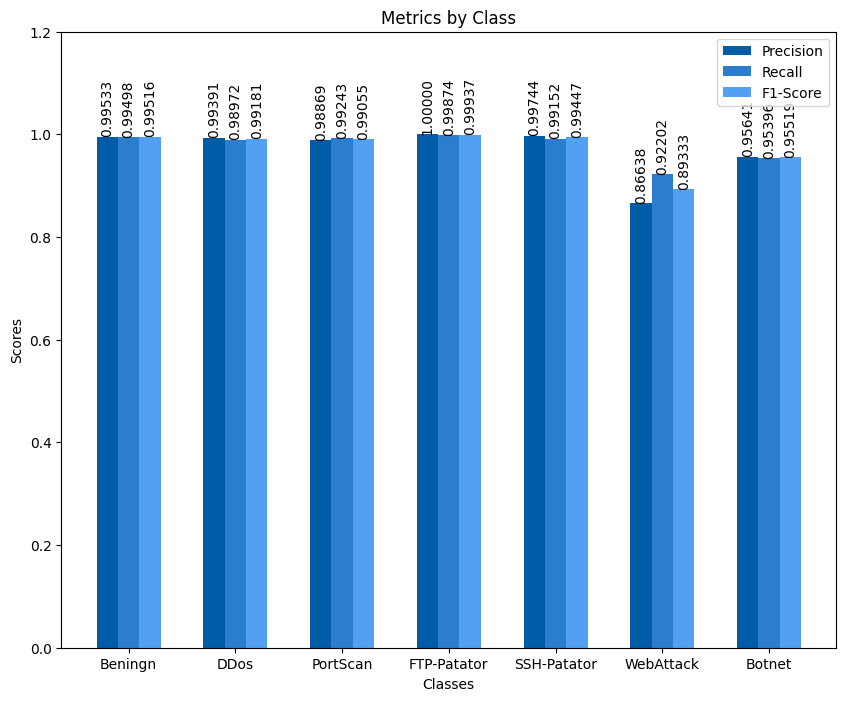

In [96]:
# Calcula o classification_report
report = classification_report(y_true, y_predict, digits=5, output_dict=True)

# Extrai as métricas relevantes
precision = [report[label]['precision'] for label in report.keys() if label.isdigit()]
recall = [report[label]['recall'] for label in report.keys() if label.isdigit()]
f1_score = [report[label]['f1-score'] for label in report.keys() if label.isdigit()]

# Nomes das classes
class_names = ['Beningn', 'DDos', 'PortScan', 'FTP-Patator', 'SSH-Patator', 'WebAttack', 'Botnet']

# Criação do gráfico de barras
fig, ax = plt.subplots(figsize=(10, 8))
bar_width = 0.2
index = range(len(class_names))

bar1 = ax.bar(index, precision, bar_width, label='Precision',color='#005ca7')
bar2 = ax.bar([i + bar_width for i in index], recall, bar_width, label='Recall',color='#2a7ecd')
bar3 = ax.bar([i + 2 * bar_width for i in index], f1_score, bar_width, label='F1-Score',color='#53a0f3')

ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Metrics by Class')
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(class_names)
ax.legend()

# Adiciona o eixo y de 0 a 1
ax.set_ylim(0, 1.2)

# Adiciona os valores das métricas ao lado de cada barra
for i, rect in enumerate(bar1):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{precision[i]:.5f}', ha='center', va='bottom', rotation=90)

for i, rect in enumerate(bar2):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{recall[i]:.5f}', ha='center', va='bottom', rotation=90)

for i, rect in enumerate(bar3):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{f1_score[i]:.5f}', ha='center', va='bottom', rotation=90)

plt.show()

#### Apply DT

In [61]:
'''
# Hyperparameter optimization of decision tree
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = DecisionTreeClassifier( **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50)
print("Decision tree: Hyperopt estimated optimum {}".format(best))
'''

'\n# Hyperparameter optimization of decision tree\nfrom hyperopt import hp, fmin, tpe, STATUS_OK, Trials\nfrom sklearn.model_selection import cross_val_score, StratifiedKFold\n# Define the objective function\ndef objective(params):\n    params = {\n        \'max_depth\': int(params[\'max_depth\']),\n        \'max_features\': int(params[\'max_features\']),\n        "min_samples_split":int(params[\'min_samples_split\']),\n        "min_samples_leaf":int(params[\'min_samples_leaf\']),\n        "criterion":str(params[\'criterion\'])\n    }\n    clf = DecisionTreeClassifier( **params)\n    clf.fit(X_train,y_train)\n    score=clf.score(X_test,y_test)\n\n    return {\'loss\':-score, \'status\': STATUS_OK }\n# Define the hyperparameter configuration space\nspace = {\n    \'max_depth\': hp.quniform(\'max_depth\', 5, 50, 1),\n    "max_features":hp.quniform(\'max_features\', 1, 20, 1),\n    "min_samples_split":hp.quniform(\'min_samples_split\',2,11,1),\n    "min_samples_leaf":hp.quniform(\'min_sam

Accuracy of DT: 0.9793033821302373
Precision of DT: 0.9798317993827447
Recall of DT: 0.9793033821302373
F1-score of DT: 0.9793618151280448
              precision    recall  f1-score   support

           0    0.98391   0.98768   0.98579     22723
           1    0.97455   0.91805   0.94545      3795
           2    0.98445   0.99874   0.99154      1585
           3    1.00000   1.00000   1.00000      1587
           4    0.97174   0.99152   0.98153      1179
           5    0.77055   0.92431   0.84046       436
           6    0.95128   0.94885   0.95006       391

    accuracy                        0.97930     31696
   macro avg    0.94807   0.96702   0.95641     31696
weighted avg    0.97983   0.97930   0.97936     31696



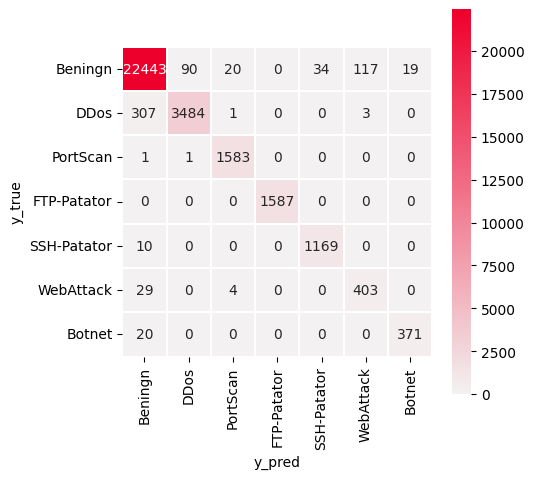

In [98]:
dt_hpo = DecisionTreeClassifier(min_samples_leaf = 1, max_depth =10, min_samples_split = 2, max_features = 2, criterion = 'entropy')
dt_hpo.fit(X_train,y_train)
dt_score=dt_hpo.score(X_test,y_test)
y_predict=dt_hpo.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict,digits=5))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True,cmap=cmap, center=0, square=True,linewidths=0.01, fmt=".0f", ax=ax, xticklabels=class_names, yticklabels=class_names)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

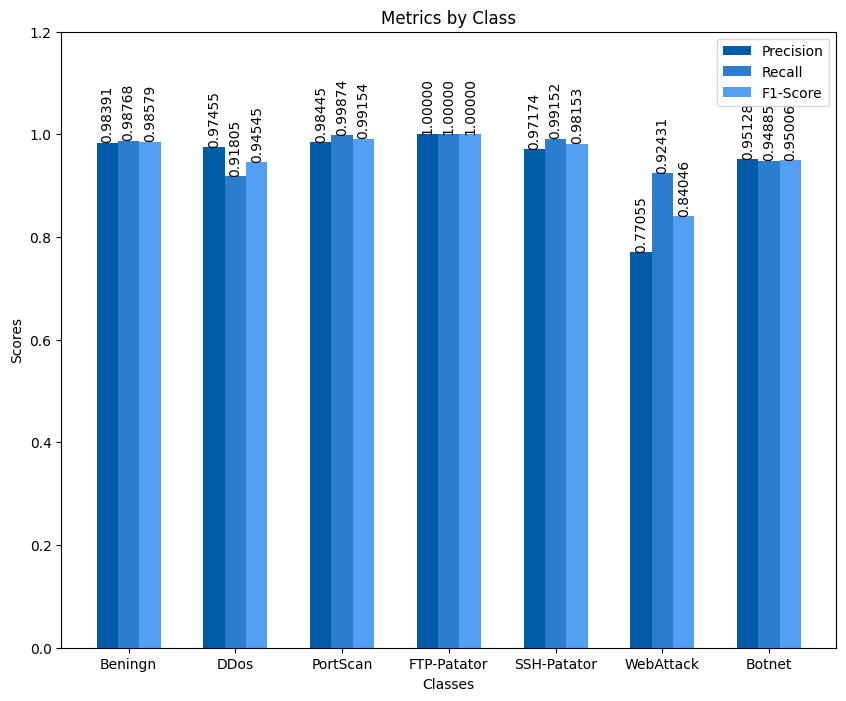

In [99]:
# Calcula o classification_report
report = classification_report(y_true, y_predict, digits=5, output_dict=True)

# Extrai as métricas relevantes
precision = [report[label]['precision'] for label in report.keys() if label.isdigit()]
recall = [report[label]['recall'] for label in report.keys() if label.isdigit()]
f1_score = [report[label]['f1-score'] for label in report.keys() if label.isdigit()]

# Nomes das classes
class_names = ['Beningn', 'DDos', 'PortScan', 'FTP-Patator', 'SSH-Patator', 'WebAttack', 'Botnet']

# Criação do gráfico de barras
fig, ax = plt.subplots(figsize=(10, 8))
bar_width = 0.2
index = range(len(class_names))

bar1 = ax.bar(index, precision, bar_width, label='Precision',color='#005ca7')
bar2 = ax.bar([i + bar_width for i in index], recall, bar_width, label='Recall',color='#2a7ecd')
bar3 = ax.bar([i + 2 * bar_width for i in index], f1_score, bar_width, label='F1-Score',color='#53a0f3')

ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Metrics by Class')
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(class_names)
ax.legend()

# Adiciona o eixo y de 0 a 1
ax.set_ylim(0, 1.2)

# Adiciona os valores das métricas ao lado de cada barra
for i, rect in enumerate(bar1):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{precision[i]:.5f}', ha='center', va='bottom', rotation=90)

for i, rect in enumerate(bar2):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{recall[i]:.5f}', ha='center', va='bottom', rotation=90)

for i, rect in enumerate(bar3):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{f1_score[i]:.5f}', ha='center', va='bottom', rotation=90)

plt.show()

In [64]:
dt_train=dt_hpo.predict(X_train)
dt_test=dt_hpo.predict(X_test)

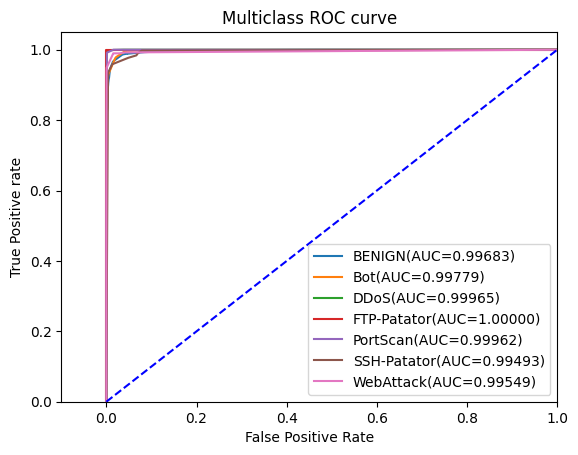

In [101]:
from sklearn.metrics import auc, roc_curve
from sklearn.preprocessing import label_binarize
#binarize the y_values

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()


pred_prob = dt_hpo.predict_proba(X_test)
classes = labelencoder.classes_
n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i],
             label='%s(AUC=%0.5f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([-0.1,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()